In [1]:
input_dim = 13
model_file = "/home/gregory/Desktop/ELDR/Housing/Model/model.cpkt"
num_clusters = 4

import json
import numpy as np
import os

import sys
sys.path.insert(0, "../Code/")
from base import load_encoder
from explain_cs import explain
from metrics import metrics, eval_epsilon
from plot import plot_polys, plot_groups, plot_metrics, plot_explanation
from misc import poly2labels

from data import load_data

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
# Load Data and Model + Compute Data Representation

x, y = load_data()

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)
    
sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})


INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


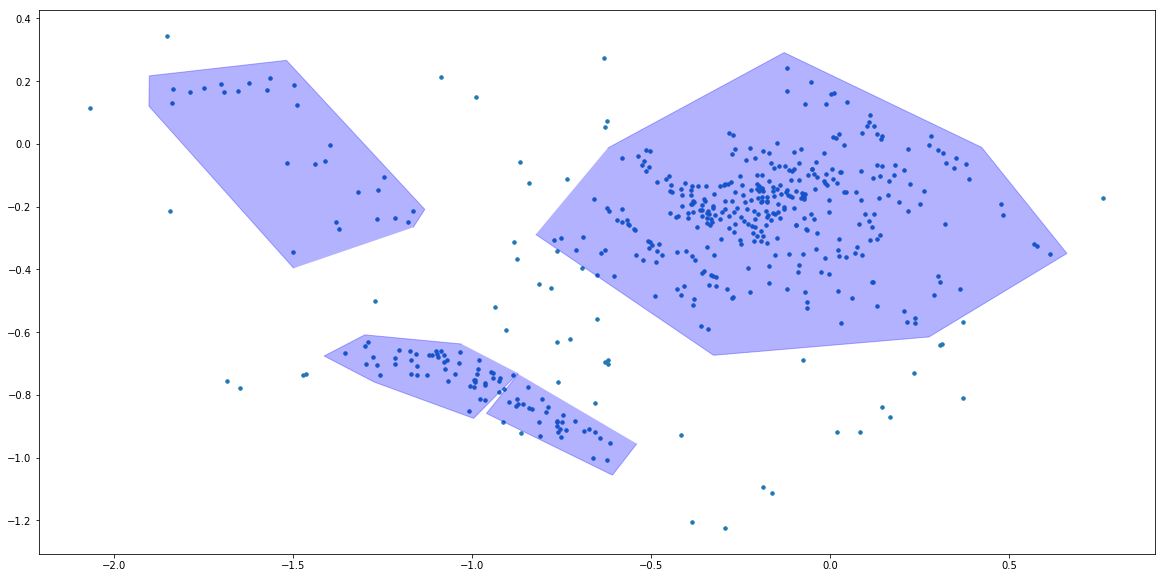

In [3]:
# Visualize the data and the marked clusters

plot_polys(data_rep, all_vertices)


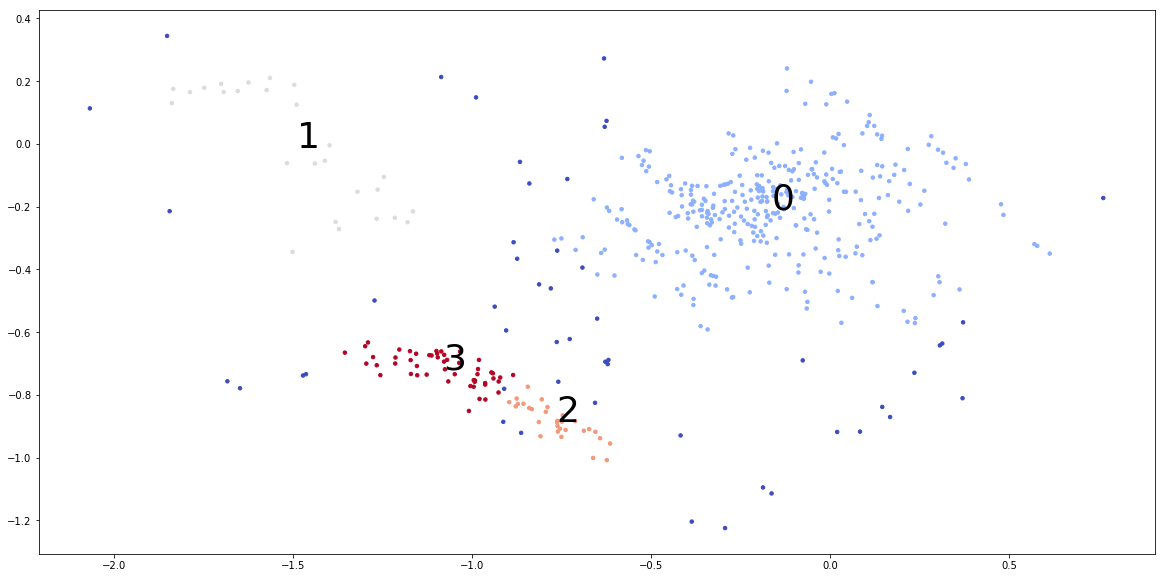

In [4]:
# Visualize the clusters in the learned representation

labels = poly2labels(data_rep, all_vertices)

means, centers, indices = plot_groups(x, data_rep, num_clusters, labels, name = "housing-rep.png")

In [5]:
# Set epsilon for our metrics

epsilon = 0.15

if True:
    eval_epsilon(load_model, x, indices, epsilon)


INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


In [6]:
# Compute the group explanations

best_val = 0.0
for i in range(5):
    deltas = explain(load_model, means, centers, learning_rate = 0.01, consecutive_steps = 5, lambda_global = 0.5)
    a, b = metrics(load_model, x, indices, deltas, epsilon)
    
    val = np.mean(a)
    
    if val > best_val:
        best_val = val
        np.save("deltas.npy", deltas)
    
    os.system("rm -rf explanation")


INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


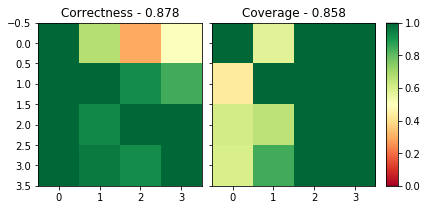

In [7]:
# Evaluate the explanations

deltas = np.load("deltas.npy")

a, b = metrics(load_model, x, indices, deltas, epsilon)

plot_metrics(a, b, name = "housing-metrics.png")

INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


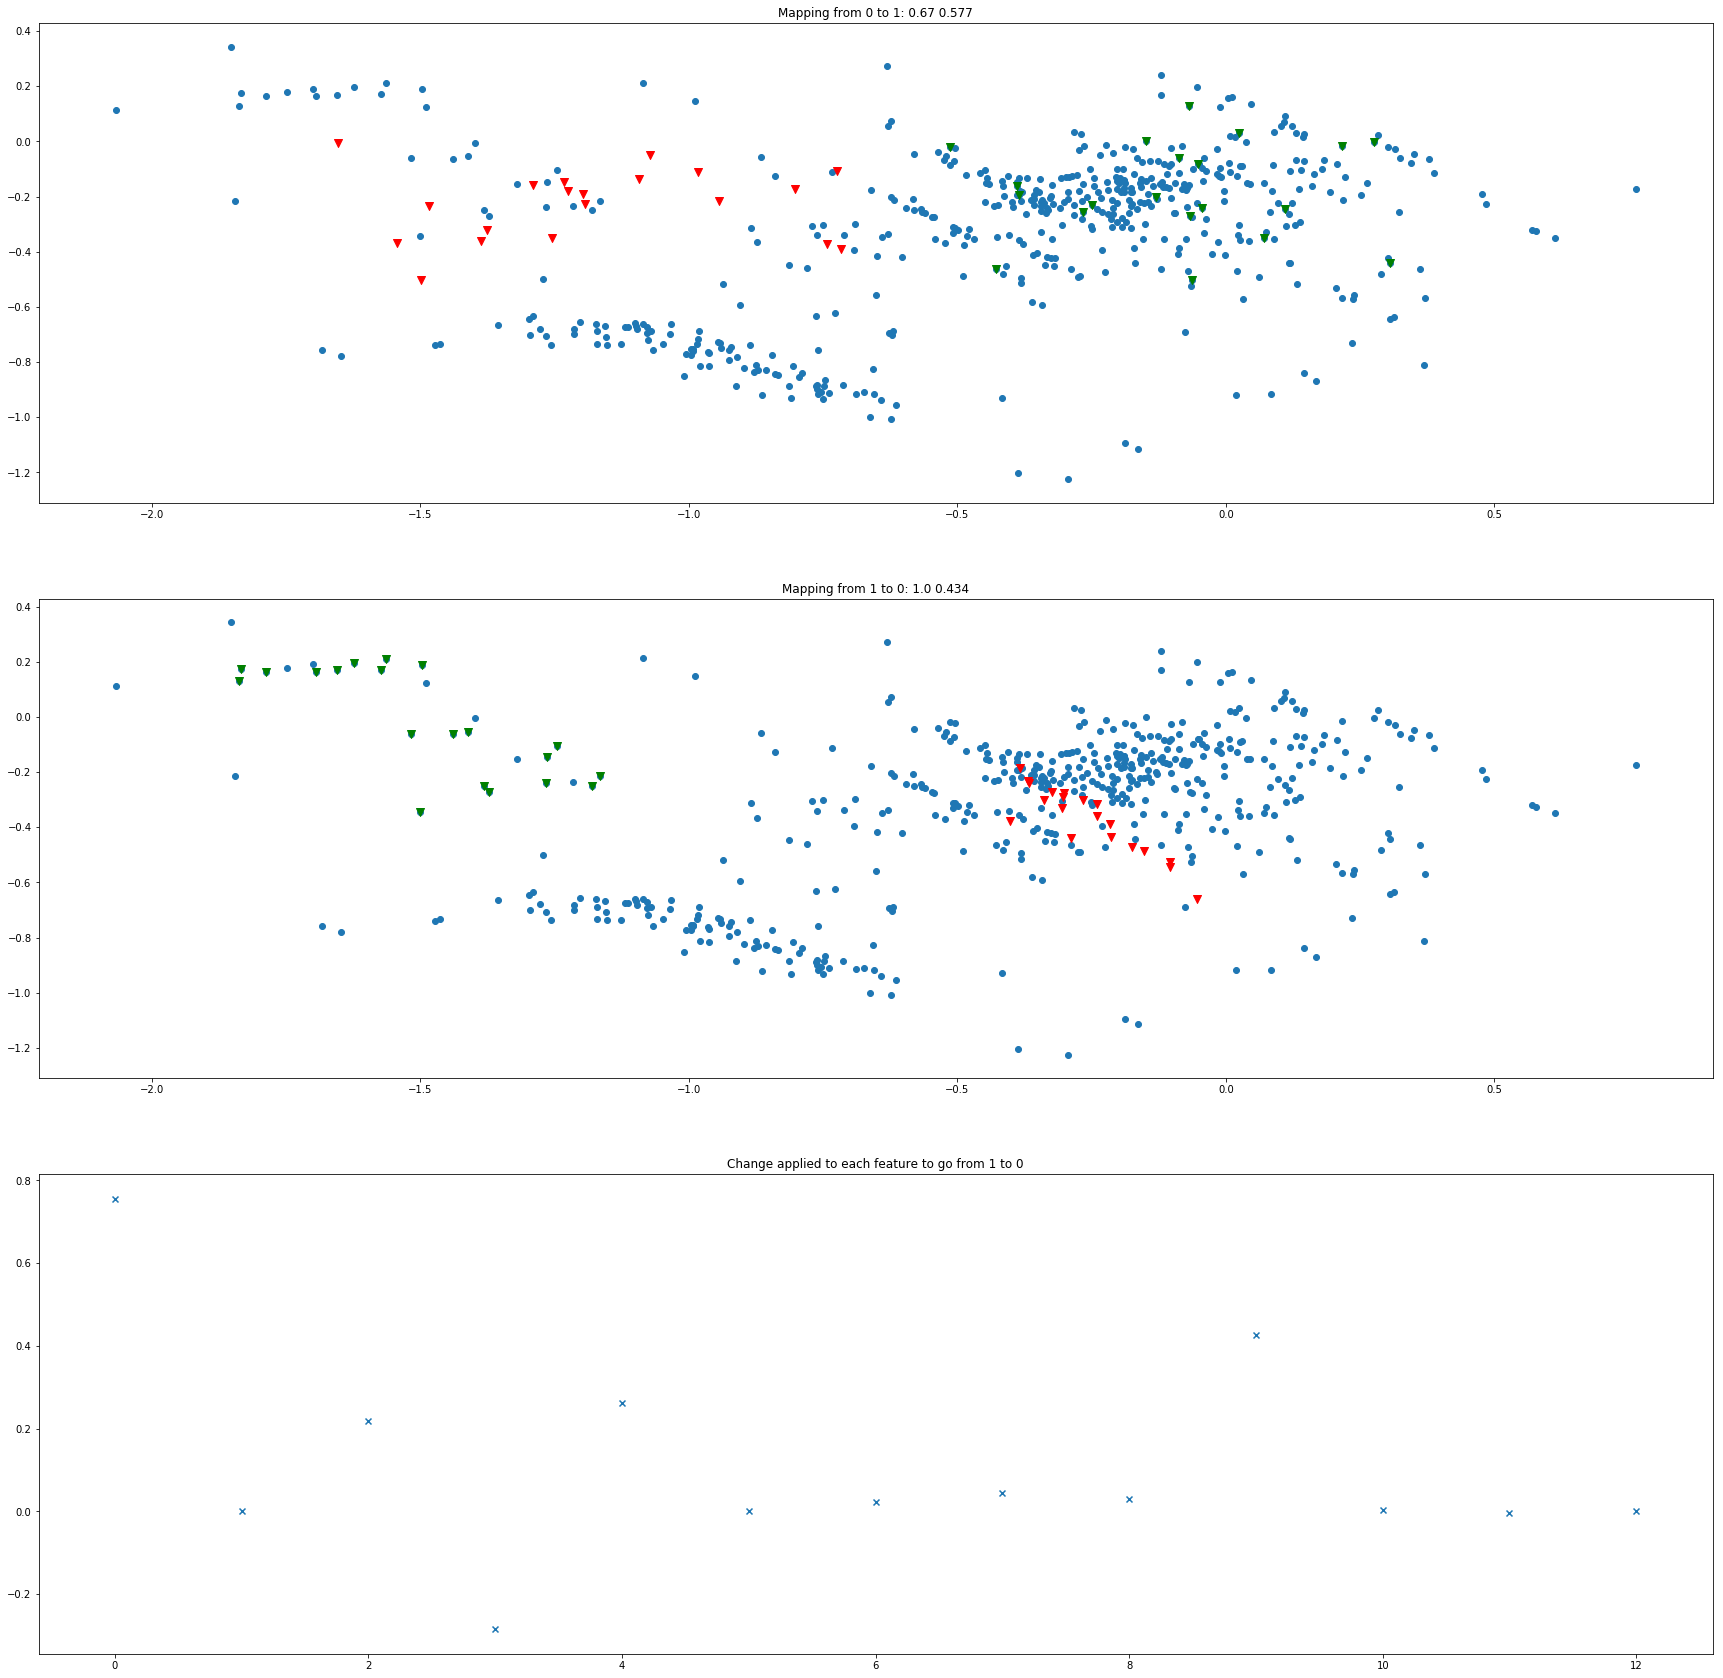

INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


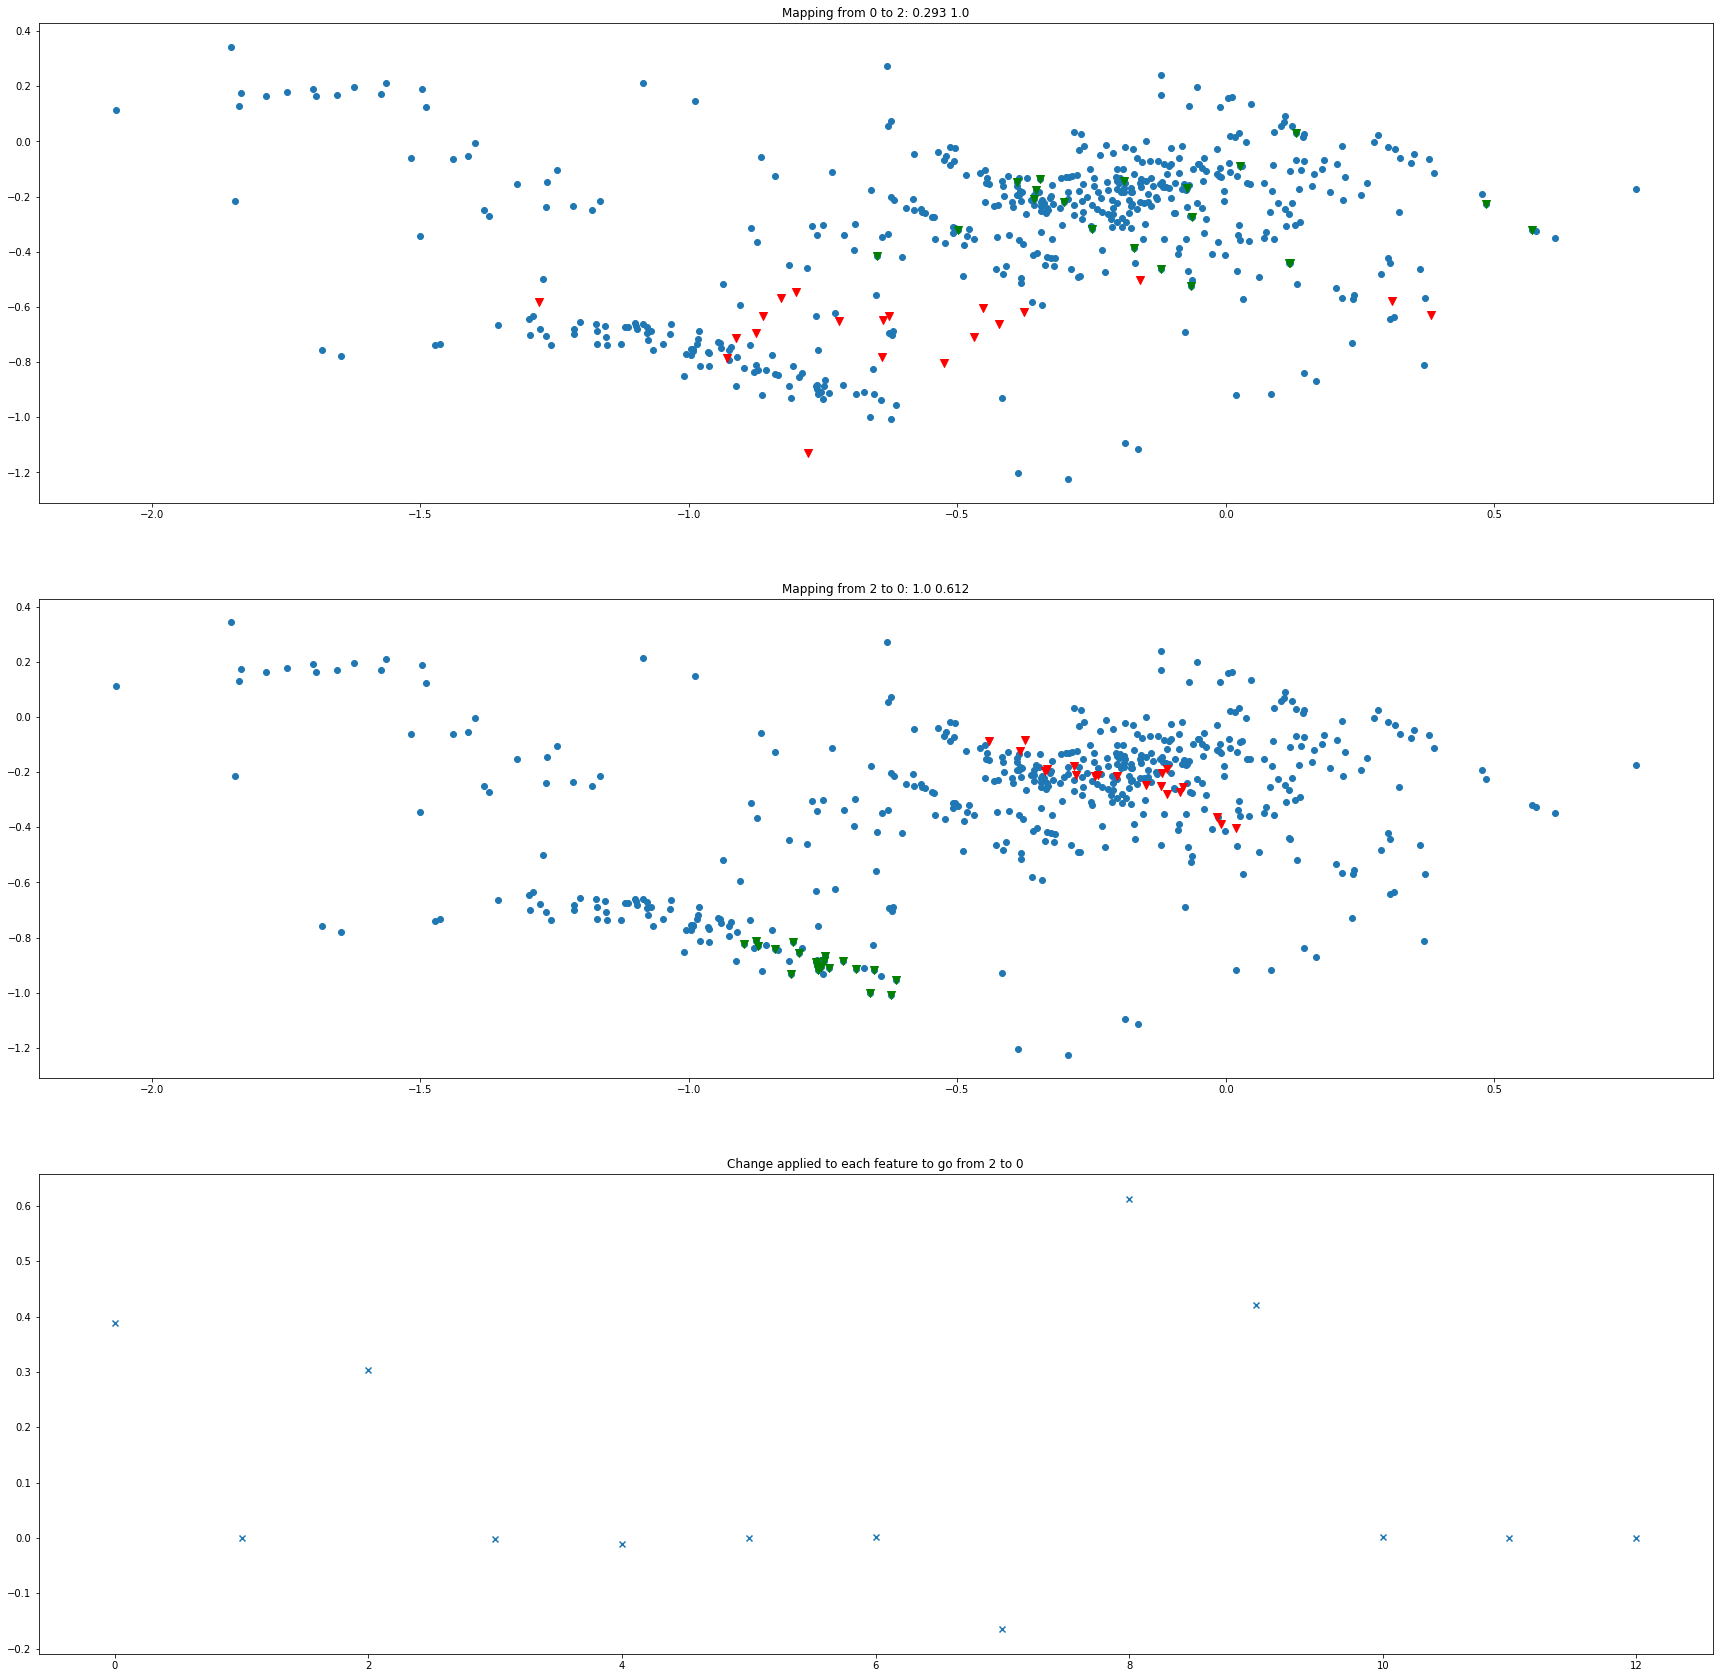

INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Housing/Model/model.cpkt


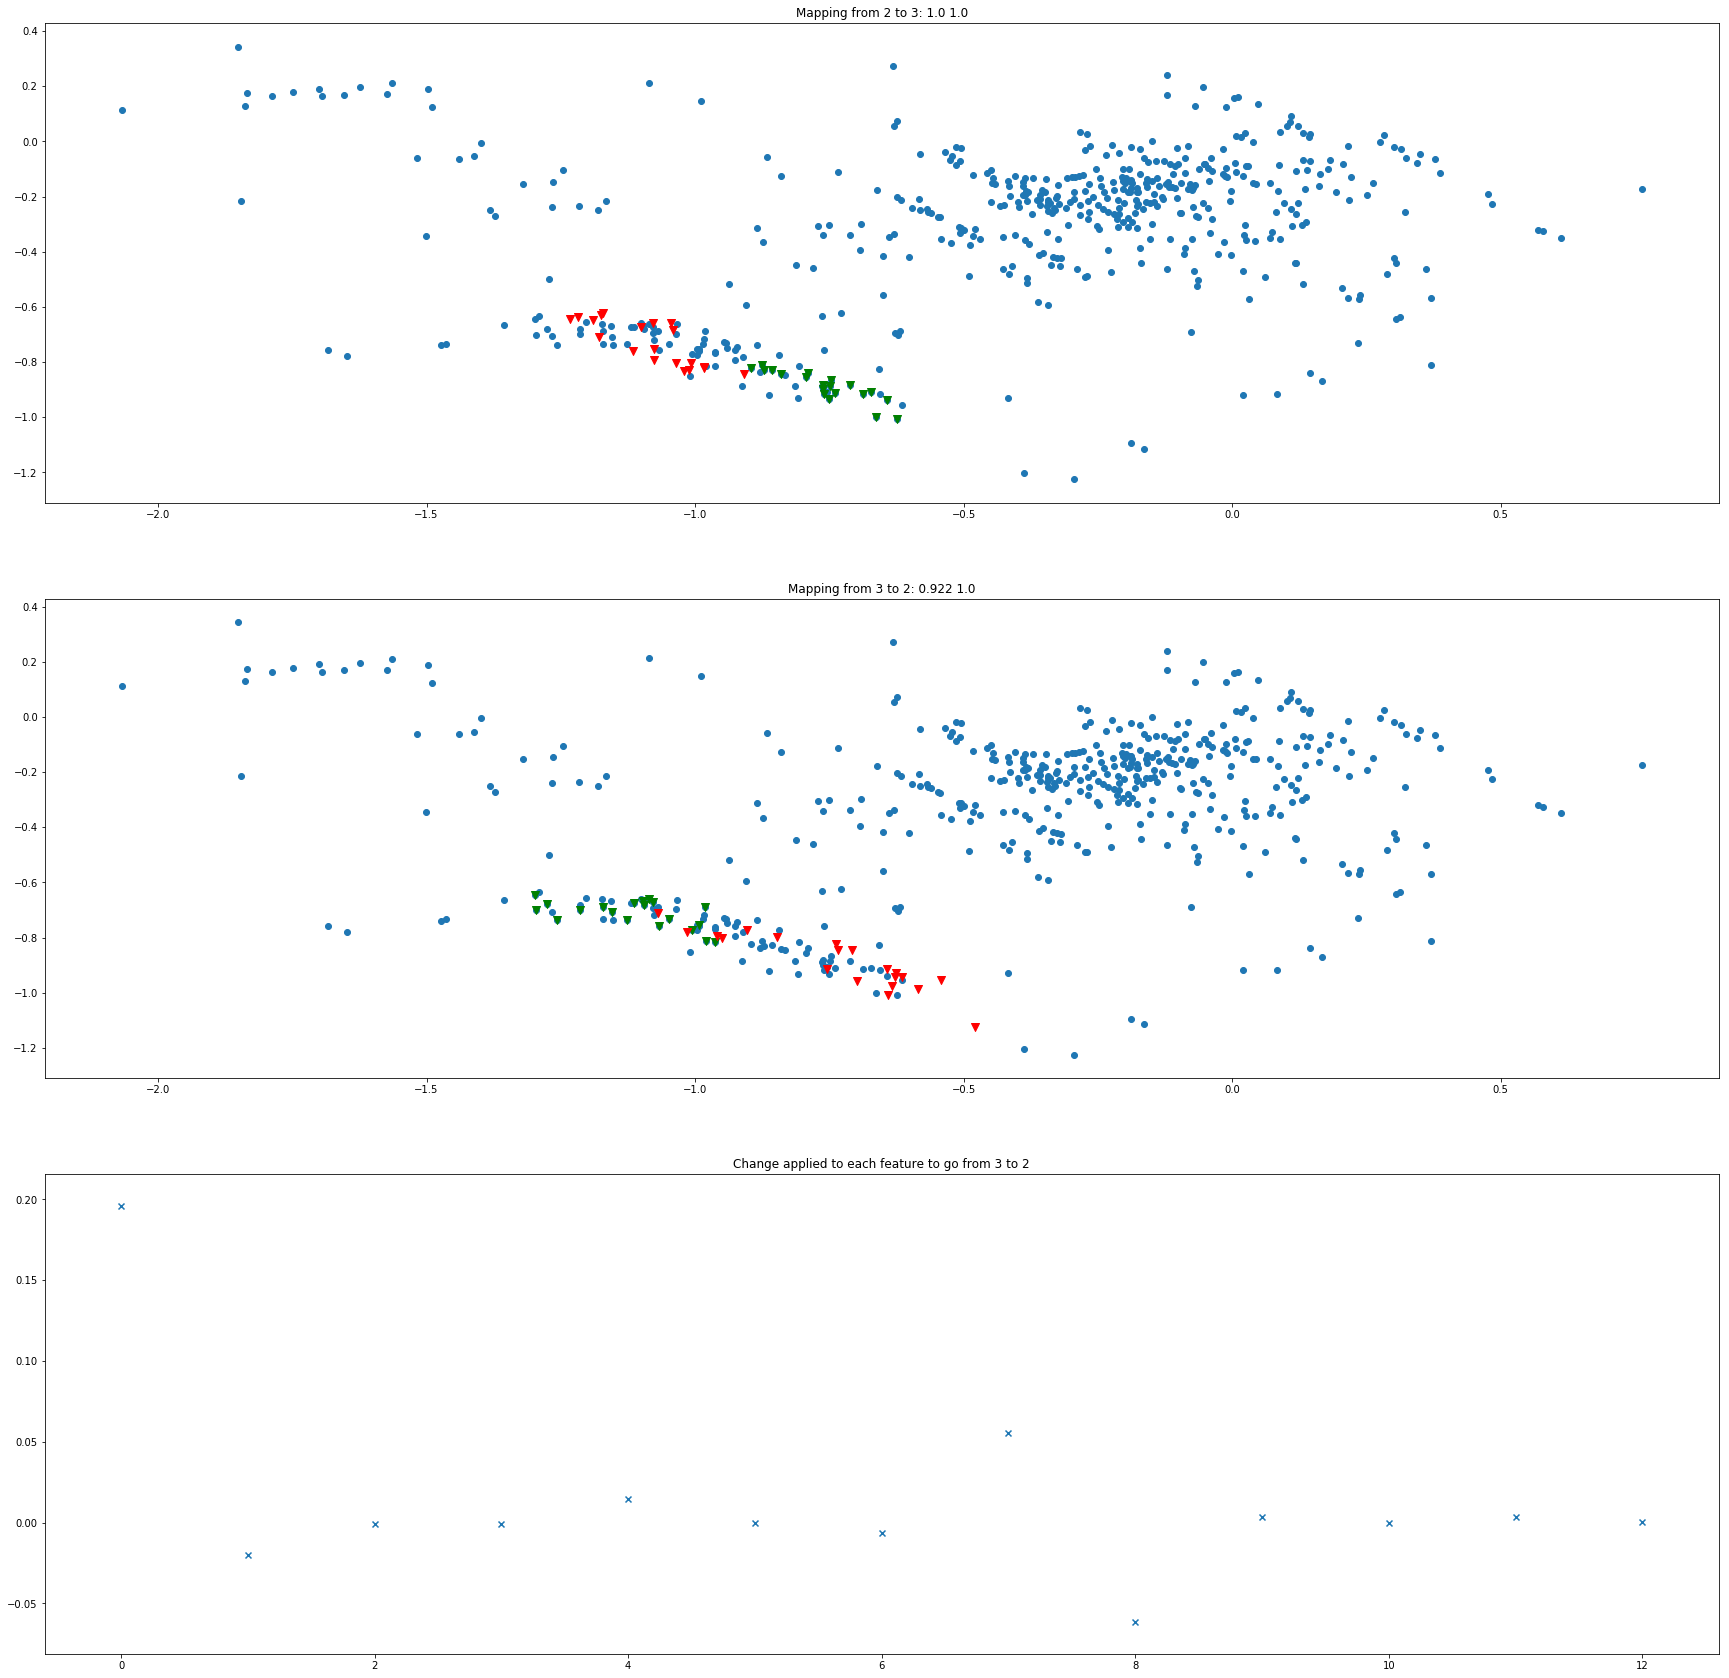

In [8]:
# Visualize the explanations

plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 0, 1, num_points = 20, name = "housing-outlier.png")

plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 0, 2, num_points = 20, name = "housing-main.png")

plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 2, 3, num_points = 20, name = "housing-within.png")
